In [1]:
import random
import numpy
import random
import model

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5105)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = model.get_data()
n, k = data.shape[0], data.shape[1]

m = model.Model(n, k)
m.try_load()
run_fn = m.get_run_fn()

float32
loading model...


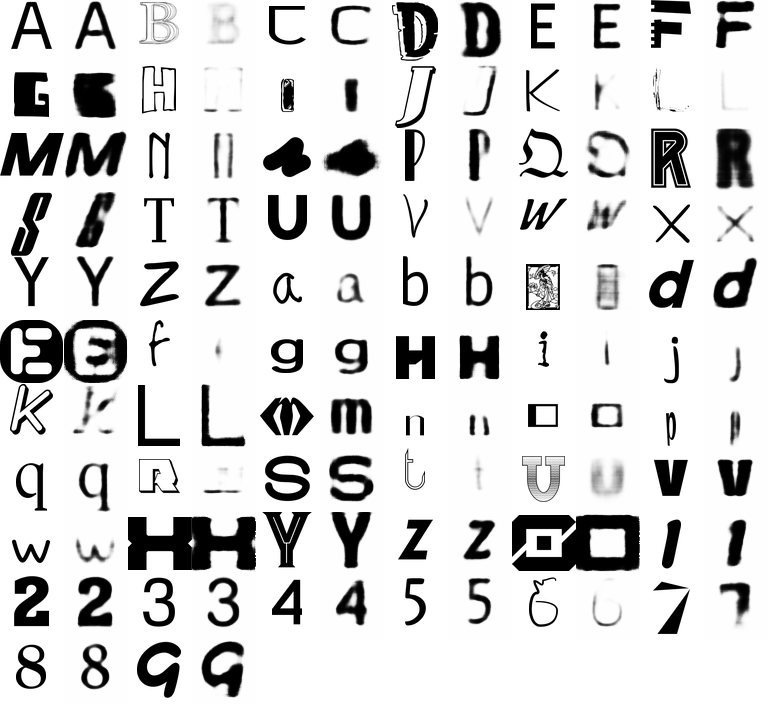

In [4]:
train_set, test_set = m.sets()
chars = {}
for i, j in test_set:
    chars.setdefault(j, []).append(i)

batch_is = numpy.zeros((k,), dtype=numpy.int32)
batch_js = numpy.zeros((k,), dtype=numpy.int32)
for z in xrange(k):
    batch_is[z] = random.choice(chars[z]) # random.randint(0, n-1)
    batch_js[z] = z

batch_pred = run_fn(batch_is, batch_js)
combined = numpy.zeros((2*k, 64 * 64))
for z in xrange(k):
    combined[2*z] = data[batch_is[z]][z].flatten() * 1.0 / 255
    combined[2*z+1] = batch_pred[z]

model.draw_grid(combined)